# Build a model to classify whether the comment is spam or not





# Objective: -

Spam comments on social media platforms are the type of comments posted to redirect the user to another social media account, website or any piece of content.Spam is content or correspondences that create a negative experience by making it difficult to find more relevant and substantive material. It can sometimes be used to indiscriminately send unsolicited bulk messages on YouTube.

The goal of this challenge is to build a machine learning model that classify whether the comment is spam or not. 
Further accurate classification of comment can help in identifying the spam.  

# Dataset: -

The dataset is openly available at Kaggle.

**Five real-valued features are computed for each cell nucleus:**

1. Comment ID
2. Author
3. Date
4. Class
5. Content

# Step 1: Import all the required libraries

- __Pandas__ : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- __Sklearn__ : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- __Pickle__ : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- __Seaborn__ : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- __Matplotlib__ : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

In [1]:
#Loading libraries 
import pandas as pd
import seaborn as sns
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.naive_bayes import BernoulliNB
import warnings

warnings.filterwarnings('ignore')

# Step 2 : Read dataset and basic details of dataset
Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.


In this stage we are going to read our problem dataset and have a look on it.

In [2]:
#loading the dataset
try:
    df = pd.read_csv('C:/My Sample Notebook/Notebook Template/Spam Comments Detection/data/Youtube01-Psy.csv') #Path for the file
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")   

Data read done successfully...


In [3]:
# To view the content inside the dataset we can use the head() method that returns a specified number of rows, string from the top. 
# The head() method returns the first 5 rows if a number is not specified.
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


# Step3: Data Preprocessing

**Why need of Data Preprocessing?**

Preprocessing data is an important step for data analysis. The following are some benefits of preprocessing data:

 - It improves accuracy and reliability. Preprocessing data removes missing or inconsistent data values resulting from human or computer error, which can improve the accuracy and quality of a dataset, making it more reliable.
 - It makes data consistent. When collecting data, it's possible to have data duplicates, and discarding them during preprocessing can ensure the data values for analysis are consistent, which helps produce accurate results.
 - It increases the data's algorithm readability. Preprocessing enhances the data's quality and makes it easier for machine learning algorithms to read, use, and interpret it.

**Why we drop column?**

By analysing the first five rows we found that there is a column named ['Comment ID'], it contains unuseful information which isn't good for our model, se we gonna drop it using the below method:

In [4]:
df = df.drop(['COMMENT_ID'], axis =1)

Axis are defined for arrays with more than one dimension. A 2-dimensional array has two corresponding axes: the first running vertically downwards across rows (axis 0) 
and the second running horizontally across columns (axis 1).

After we read the data, we can look at the data using:

In [5]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 350 rows and 4 columns


#### By analysing the problem statement and the dataset, we get to know that the target variable is "CLASS" column which says if the cancer is (0 = Not spam) or (1 = Spam). 

In [6]:
df['CLASS'].value_counts()

1    175
0    175
Name: CLASS, dtype: int64

#### The df.value_counts() method counts the number of types of values a particular column contains. 

In [7]:
df.shape

(350, 4)

#### The df.shape method shows the shape of the dataset. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   AUTHOR   350 non-null    object
 1   DATE     350 non-null    object
 2   CONTENT  350 non-null    object
 3   CLASS    350 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 11.1+ KB


#### The df.info() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 

In [9]:
df.iloc[1]

AUTHOR                                           adam riyati
DATE                                     2013-11-07T12:37:15
CONTENT    Hey guys check out my new channel and our firs...
CLASS                                                      1
Name: 1, dtype: object

####  df.iloc[ ] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. The iloc property gets, or sets, the value(s) of the specified indexes.

### Data Type Check for every column

**Why data type check is required?**

Data type check helps us with understanding what type of variables our dataset contains. It helps us with identifying whether to keep that variable or not. If the dataset contains contiguous data, then only float and integer type variables will be beneficial and if we have to classify any value then categorical variables will be beneficial.

In [10]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)

In [11]:
print("Total number of categorical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)

Total number of categorical columns are  3
There names are as follows:  ['AUTHOR', 'DATE', 'CONTENT']


In [12]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

In [13]:
print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)

Total number of numerical columns are  1
There names are as follows:  ['CLASS']


In [14]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)

In [15]:
print("Total number of float64 columns are ", len(float64_lst))
print("There name are as follow: ", float64_lst)

Total number of float64 columns are  0
There name are as follow:  []


## Step 2 Insights: -

1) We have total 4 features where 3 of them are object type and 1 is integer type.
2) Drop "COMMENT_ID" columns.

After this step we have to calculate various evaluation parameters which will help us in cleaning and analysing the data more accurately.

# Step 3: Descriptive Analysis

**Goal/Purpose:**  Finding the data distribution of the features. Visualization helps to understand data and also to explain the data to another person.

Things we are going to do in this step:

1. Mean
2. Median
3. Mode
4. Standard Deviation
5. Variance
6. Null Values
7. NaN Values
8. Min value
9. Max value
10. Count Value
11. Quatilers
12. Correlation
13. Skewness

In [16]:
df.describe()

,CLASS
count,350.000000
mean,0.500000
std,0.500716
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


#### The df.describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value. 

# Measure the variability of data of the dataset

Variability describes how far apart data points lie from each other and from the center of a distribution.

# 1. Standard Deviation

The standard deviation is the average amount of variability in your dataset.

It tells you, on average, how far each data point lies from the mean. The larger the standard deviation, the more variable the data set is and if zero variance then there is no variability in the dataset that means there no use of that dataset.


So, it helps in understanding the measurements when the data is distributed. The more the data is distributed, the greater will be the standard deviation of that data.Here, you as an individual can determine which company is beneficial in long term. But, if you didn't know the SD you would have choosen a wrong compnay for you.

In [17]:
df.std()

CLASS    0.500716
dtype: float64

#### We can also understand the standard deviation using the below function. 

In [18]:
def std_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].std(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    std_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return std_total_df

# 2. Variance

The variance is the average of squared deviations from the mean. A deviation from the mean is how far a score lies from the mean.

Variance is the square of the standard deviation. This means that the units of variance are much larger than those of a typical value of a data set.

#### Why do we used Variance ?

By Squairng the number we get non-negative computation i.e. Disperson cannot be negative.
The presence of variance is very important in your dataset because this will allow the model to learn about the different patterns hidden in the data

In [19]:
df.var()

CLASS    0.250716
dtype: float64

#### We can also understand the Variance using the below function.

In [20]:
zero_cols = []

def var_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].var(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
            zero_cols.append(value)
    
    var_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return var_total_df

# Measure central tendency

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. As such, measures of central tendency are sometimes called measures of central location. They are also classed as summary statistics.



# Null and Nan values

1. **Null Values**


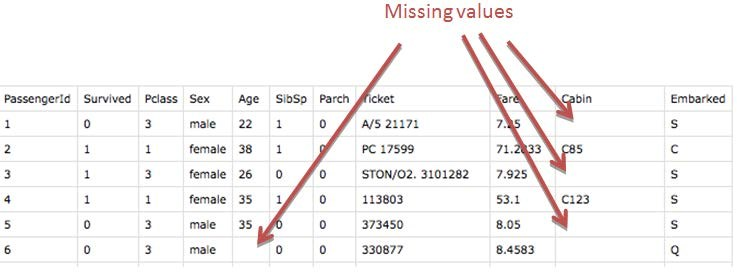

A null value in a relational database is used when the value in a column is unknown or missing. A null is neither an empty string (for character or datetime data types) nor a zero value (for numeric data types).

In [22]:
df.isnull().sum()

AUTHOR     0
DATE       0
CONTENT    0
CLASS      0
dtype: int64

As we notice that there are no null values in our dataset.

2. **Nan Values**

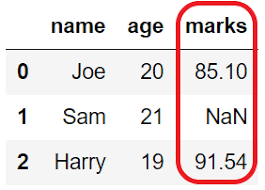

NaN, standing for Not a Number, is a member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable, especially in floating-point arithmetic.

In [23]:
df.isna().sum()

AUTHOR     0
DATE       0
CONTENT    0
CLASS      0
dtype: int64

As we notice that there are no nan values in our dataset.

#### Another way to remove null and nan values is to use the method "df.dropna(inplace=True)". 

In [24]:
df['CLASS']

0      1
1      1
2      1
3      1
4      1
      ..
345    0
346    0
347    1
348    1
349    0
Name: CLASS, Length: 350, dtype: int64

### Step 3 Insights: - 

With the statistical analysis we have found that the data have a lot of skewness in them all the columns are positively skewed with mostly zero variance.

Statistical analysis is little difficult to understand at one glance so to make it more understandable we will perform visulatization on the data which will help us to understand the process easily.

### Why we are calculating all these metrics? 

Mean / Median /Mode/ Variance /Standard Deviation are all very basic but very important concept of statistics used in data science. Almost all the machine learning algorithm uses these concepts in data preprocessing steps. These concepts are part of descriptive statistics where we basically used to describe and understand the data for features in Machine learning

<AxesSubplot: xlabel='CLASS', ylabel='count'>

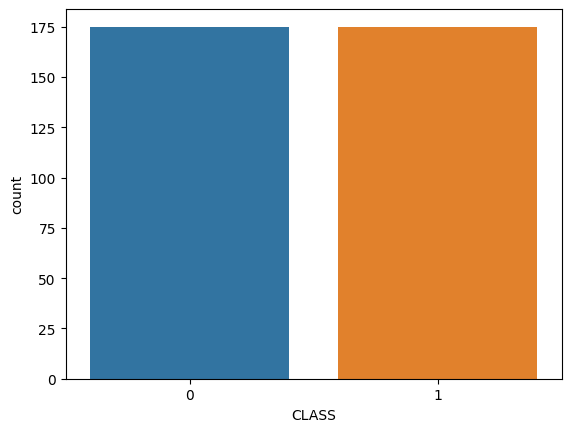

In [25]:
sns.countplot(x=df['CLASS'])

### The ratio for both the values are equal.

# Step 4: Data Exploration
**Goal/Purpose:**

Graphs we are going to develop in this step

1. Histogram of all columns to check the distrubution of the columns
2. Distplot or distribution plot of all columns to check the variation in the data distribution
3. Heatmap to calculate correlation within feature variables
4. Boxplot to find out outlier in the feature columns

# 1. Histogram

A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis.The vertical y-axis represents the number count or percentage of occurrences in the data for each column

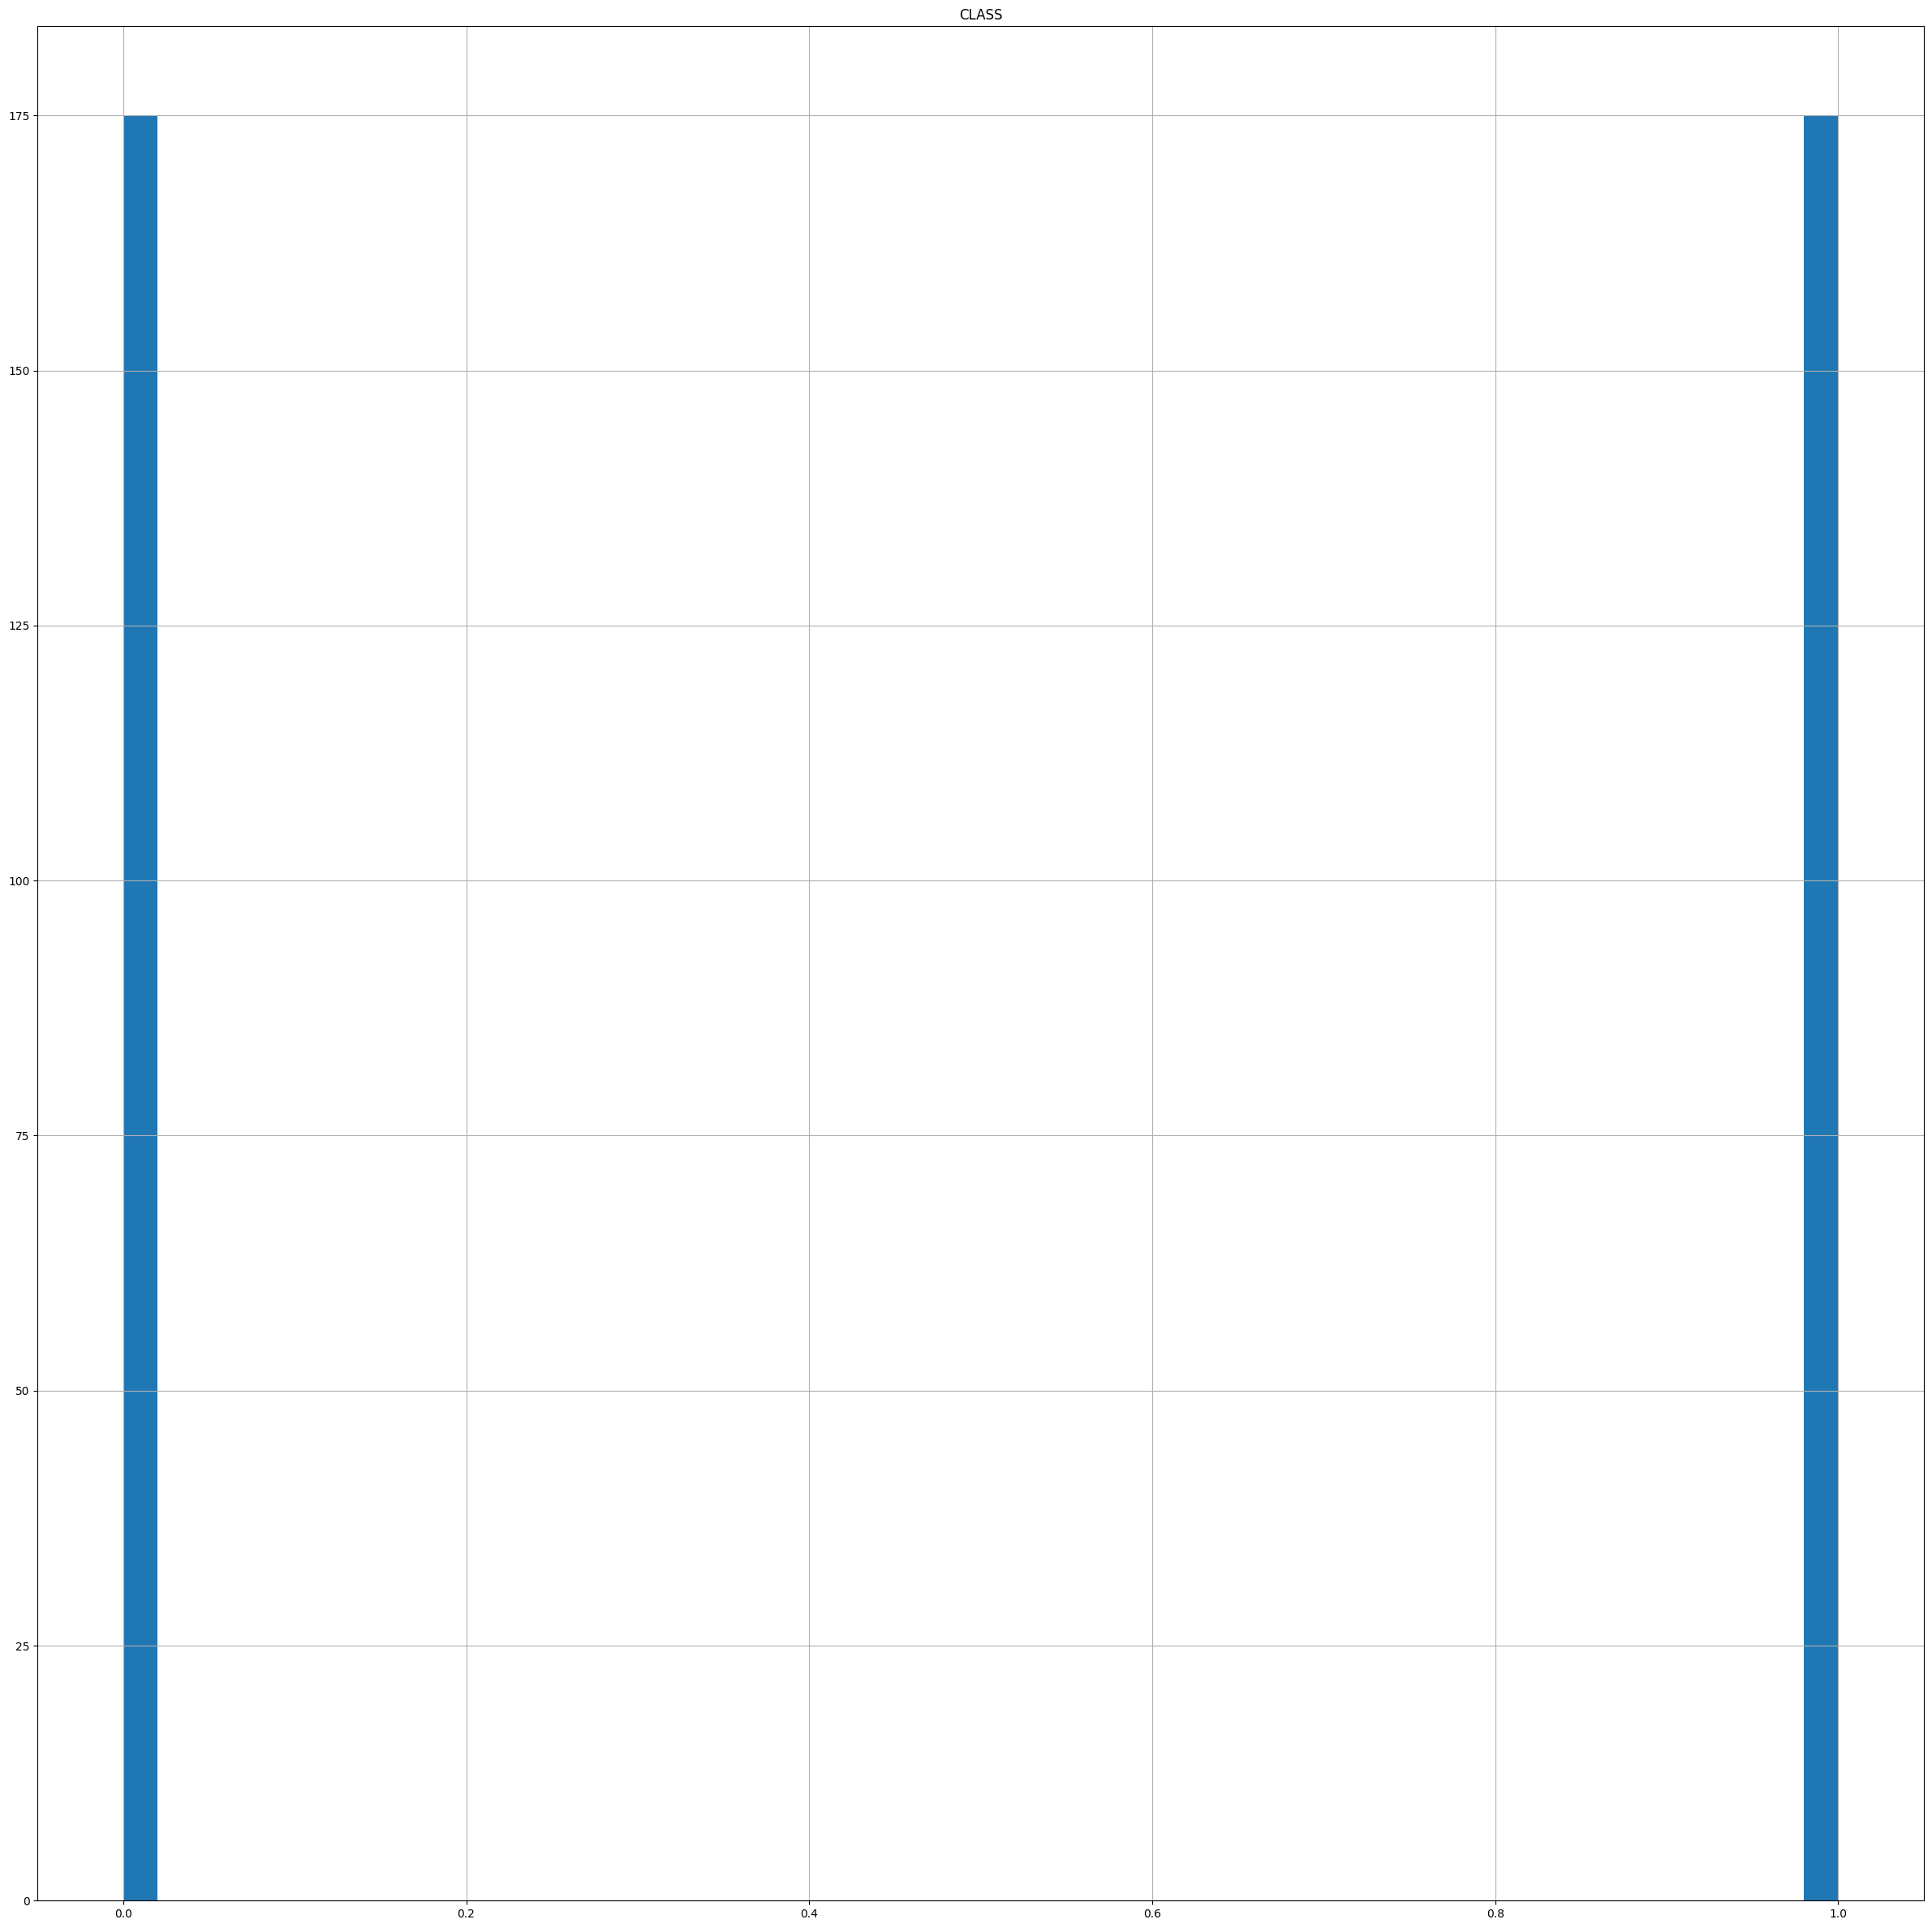

In [26]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(30,30))
plt.show()


### Histogram Insight: -

Histogram helps in identifying the following:
- View the shape of your data set’s distribution to look for outliers or other significant data points.

- Determine whether something significant has boccurred from one time period to another.

### Why Histogram? 

It is used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

From the above graphical representation we can identify that the highest bar represents the outliers which is above the maximum range.

We can also identify that the values are moving on the right side, which determines positive and the centered values determines normal skewness.

# 2. Distplot

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it 

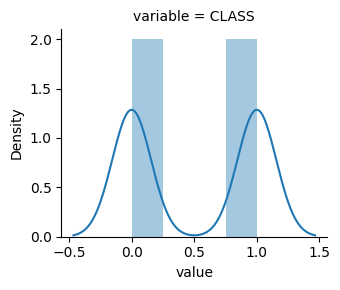

In [27]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

### Distplot Insights: -

Above is the distrution bar graphs to confirm about the statistics of the data about the skewness, the above results are:

2. 1 column i.e CLASSS which is our target variable ~ which is also +ve skewed. In that case we'll need to log transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables

### Why Distplot?
Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve. If the bell curve is shifted to the left or the right, it is said to be skewed.

We can observe that the bell curve is shifted to left we indicates positive skewness.As all the column are positively skewed we don't need to do scaling.

Let's proceed and check the distribution of the target variable.


In [28]:
#+ve skewed 
df['CLASS'].skew()

0.0

#### The target variable is positively skewed.A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. 

# 3. Heatmap




A heatmap (or heat map) is a graphical representation of data where values are depicted by color.Heatmaps make it easy to visualize complex data and understand it at a glance 

__Correlation__ - A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.

Correlation can have a value:

- 1 is a perfect positive correlation
- 0 is no correlation (the values don't seem linked at all)
- -1 is a perfect negative correlation



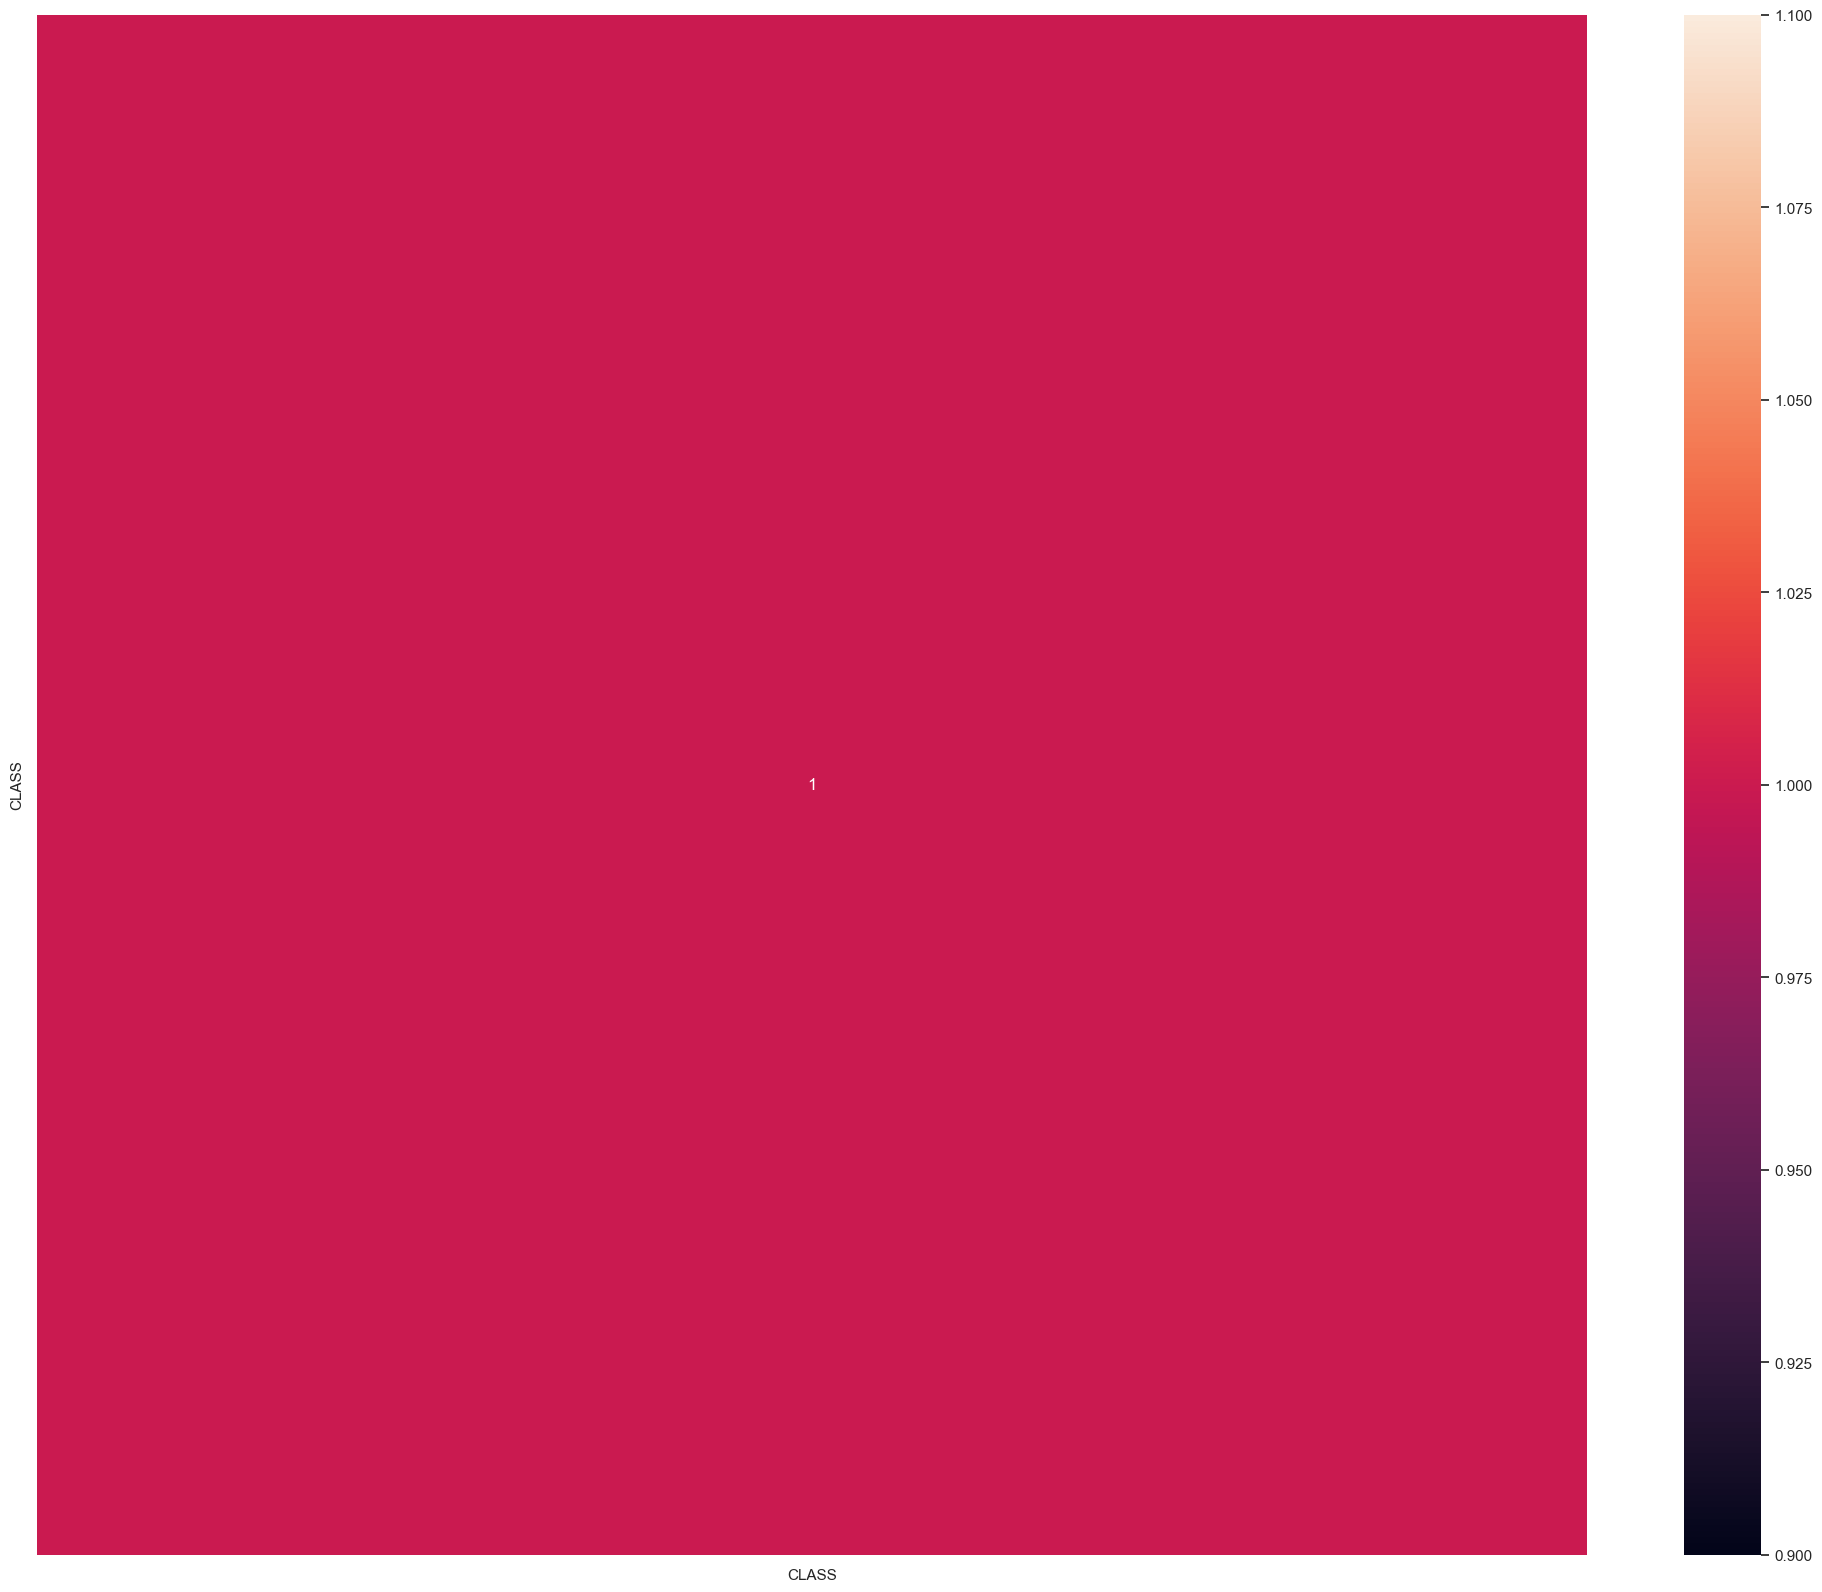

In [29]:
#correlation plot
sns.set(rc = {'figure.figsize':(25,20)})
corr = df.corr().abs()
sns.heatmap(corr,annot=True) 
plt.show()

### Notice the last column from right side of this map. We can see the correlation of all variables against diagnosis. As you can see, some variables seem to be strongly correlated with the target variable. Here, a numeric correlation score will help us understand the graph better.

In [30]:
corr

,CLASS
CLASS,1.0


### Heatmap insights: -

As we know, it is recommended to avoid correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, hence increasing the risk of errors.




### Why Heatmap?

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.

# 4. Boxplot

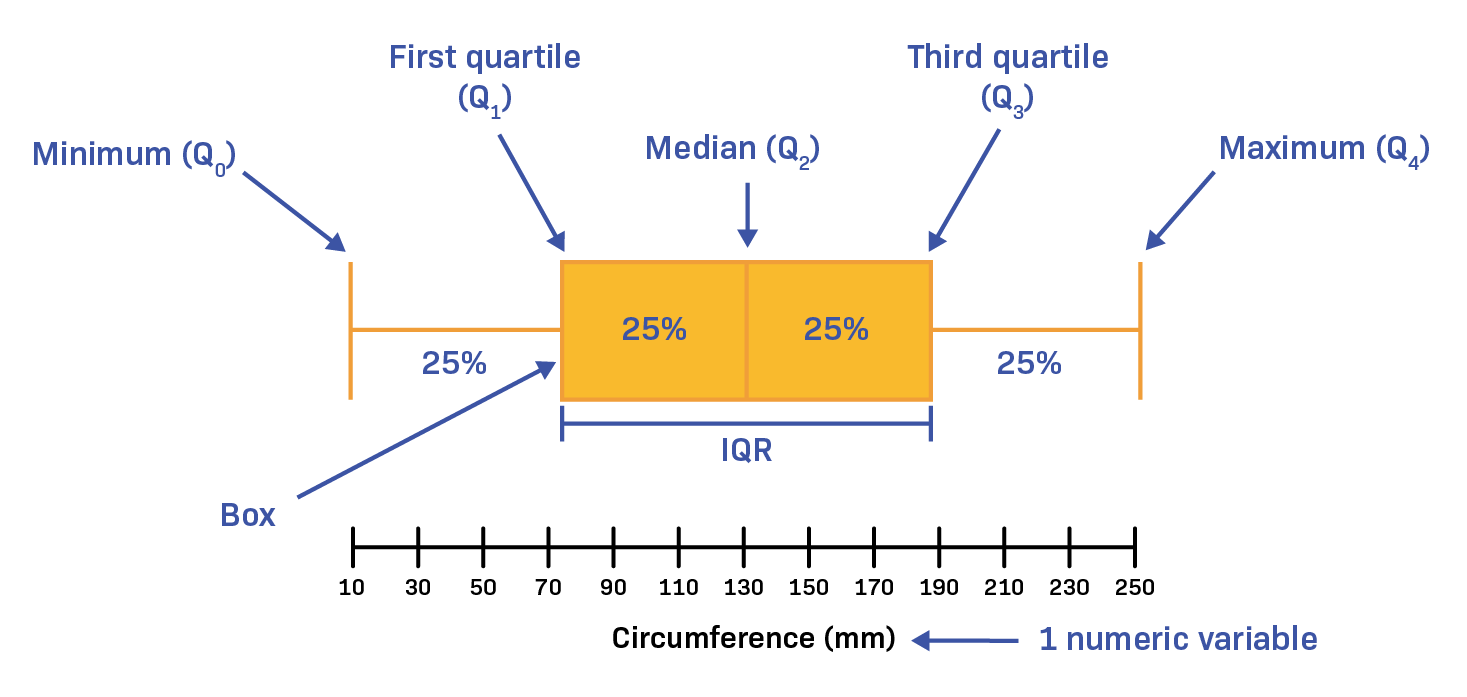

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”).

Basically, to find the outlier in a dataset/column.

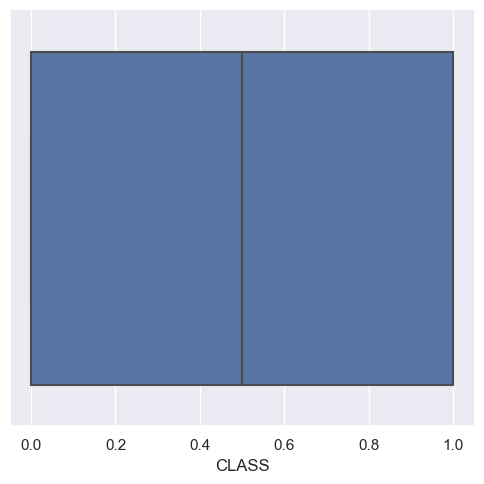

In [31]:
sns.catplot(data=df, x='CLASS',  kind="box")

#### The dark points are known as Outliers. Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations.

### Boxplot Insights: - 
- Sometimes outliers may be an error in the data and should be removed. In this case these points are correct readings yet they are different from the other points that they appear to be incorrect.

- The best way to decide wether to remove them or not is to train models with and without these data points and compare their validation accuracy.

- So we will keep it unchanged as it won't affect our model.

Here, we can see that most of the variables possess outlier values. It would take us days if we start treating these outlier values one by one. Hence, for now we'll leave them as is and let our algorithm deal with them. As we know, tree-based algorithms are usually robust to outliers.

### Why Boxplot?
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.



In the next step we will divide our cleaned data into training data and testing data.

### As the problem is based on Natural Language Processing so data visualization isn't needed because majority columns are categorical.

We only need the content and class column from the dataset for the rest of the task. So let’s select both the columns and move further:

In [40]:
data = df[["CONTENT", "CLASS"]]
print(data.sample(5))

                                               CONTENT  CLASS
258                     C'mon 3 billion views!!!!!!!!﻿      0
303  im sorry for the spam but My name is Jenny. I ...      1
187           I'm here to check the views.. holy shit﻿      0
315  PLEASE SUBSCRIBE ME!!!!!!!!!!!!!!!!!!!!!!!!!!!...      1
299     I am so awesome and smart!!! Sucscribe to me!﻿      1


#### The class column contains values 0 and 1. 0 indicates not spam, and 1 indicates spam. So to make it look better, I will use spam and not spam labels instead of 1 and 0:

In [41]:
data["CLASS"] = data["CLASS"].map({0: "Not Spam",
                                   1: "Spam Comment"})
print(data.sample(5))

                                               CONTENT         CLASS
252           This video is so cool, again and again!﻿      Not Spam
303  im sorry for the spam but My name is Jenny. I ...  Spam Comment
234  What Can i say....This Song He Just Change The...      Not Spam
131  PSY GOT LOTS  OF MONEY FROM YOUTUBE THAT HE GO...      Not Spam
296  If i reach 100 subscribers i will tazz my self...  Spam Comment


# Step 2: Data Preparation
**Goal:-**

Tasks we are going to in this step:

1. Now we will spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.
2. Split dataset into train and test dataset.
3. Scaling on train dataset.

**1. Now we spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.**

In [42]:
# Separate target and feature column in X and y variable
# X will be the features
X = np.array(data["CONTENT"]) 
#y will be the target variable
y = np.array(data["CLASS"])

In [43]:
X

array(['Huh, anyway check out this you[tube] channel: kobyoshi02',
       "Hey guys check out my new channel and our first vid THIS IS US THE  MONKEYS!!! I'm the monkey in the white shirt,please leave a like comment  and please subscribe!!!!",
       'just for test I have to say murdev.com',
       'me shaking my sexy ass on my channel enjoy ^_^ \ufeff',
       'watch?v=vtaRGgvGtWQ   Check this out .\ufeff',
       'Hey, check out my new website!! This site is about kids stuff. kidsmediausa  . com',
       'Subscribe to my channel \ufeff',
       'i turned it on mute as soon is i came on i just wanted to check the  views...\ufeff',
       'You should check my channel for Funny VIDEOS!!\ufeff',
       'and u should.d check my channel and tell me what I should do next!\ufeff',
       'Hey subscribe to me\ufeff',
       " Once you have started reading do not stop. If you do not subscribe to me  within one day you and you're entire family will die so if you want to stay  alive subscribe ri

In [44]:
y

array(['Spam Comment', 'Spam Comment', 'Spam Comment', 'Spam Comment',
       'Spam Comment', 'Spam Comment', 'Spam Comment', 'Not Spam',
       'Spam Comment', 'Spam Comment', 'Spam Comment', 'Spam Comment',
       'Spam Comment', 'Spam Comment', 'Spam Comment', 'Spam Comment',
       'Not Spam', 'Spam Comment', 'Spam Comment', 'Spam Comment',
       'Not Spam', 'Spam Comment', 'Spam Comment', 'Not Spam',
       'Spam Comment', 'Spam Comment', 'Spam Comment', 'Spam Comment',
       'Not Spam', 'Spam Comment', 'Spam Comment', 'Not Spam',
       'Spam Comment', 'Spam Comment', 'Not Spam', 'Not Spam',
       'Spam Comment', 'Spam Comment', 'Spam Comment', 'Spam Comment',
       'Spam Comment', 'Spam Comment', 'Spam Comment', 'Spam Comment',
       'Spam Comment', 'Spam Comment', 'Not Spam', 'Spam Comment',
       'Not Spam', 'Not Spam', 'Spam Comment', 'Not Spam', 'Not Spam',
       'Spam Comment', 'Spam Comment', 'Spam Comment', 'Spam Comment',
       'Spam Comment', 'Spam Comment', 'Sp

In [45]:
# Check the shape of X and y variable
X.shape, y.shape

((350,), (350,))

#### Machines cannot understand characters and words. So when dealing with text data we need to represent it in numbers to be understood by the machine. Countvectorizer is a method to convert text to numerical data. To show you how it works let’s take an example:

text = [‘Hello my name is james, this is my python notebook’]

The text is transformed to a sparse matrix as shown below.

- Hello is james my name notebook python this

- 1      2  1    2  1     1       1      1

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer()
X = count_vec.fit_transform(X)

#### With CountVectorizer we are converting raw text to a numerical vector representation of words and n-grams. This makes it easy to directly use this representation as features (signals) in Machine Learning tasks such as for text classification and clustering.

#### 2. Spliting the dataset in training and testing data. 

*Here we are spliting our dataset into 80/20 percentage where 80% dataset goes into the training part and 20% goes into testing  part.*

In [47]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 1418), (70, 1418), (280,), (70,))

### Insights: -

Train test split technique is used to estimate the performance of machine learning algorithms which are used to make predictions on data not used to train the model.It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. Although simple to use and interpret, there are times when the procedure should not be used, such as when you have a small dataset and situations where additional configuration is required, such as when it is used for classification and the dataset is not balanced.

In the next step we will train our model on the basis of our training and testing data.

# Step 3: Model Training

#### Goal:
In this step we are going to train our dataset on different classification algorithms. As we know that our target variable is in discrete format so we have to apply classification algorithm. Target variable is a category like filtering.In our dataset we have the outcome variable or Dependent variable i.e Y having only two set of values, either 1 (Spam) or 0(Not Spam). So we will use Classification algorithm**

__Algorithms we are going to use in this step__

1. Bernoulli Naive Bayes
2. Linear SVC
3. Random Forest Classification

K-fold cross validation is a procedure used to estimate the skill of the model on new data. There are common tactics that you can use to select the value of k for your dataset. There are commonly used variations on cross-validation, such as stratified and repeated, that are available in scikit-learn

In [49]:
# Define kfold with 10 split
cv1 = KFold(n_splits=10, shuffle=True, random_state=42)

The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

# 1. Bernoulli Naive Bayes

Naive Bayes is a supervised machine learning algorithm to predict the probability of different classes based on numerous attributes. It indicates the likelihood of occurrence of an event. Naive Bayes is also known as conditional probability.

Bernoulli Naive Bayes is a part of the Naive Bayes family. It is based on the Bernoulli Distribution and accepts only binary values, i.e., 0 or 1. If the features of the dataset are binary, then we can assume that Bernoulli Naive Bayes is the algorithm to be used.

#### Train set cross-validation 

In [50]:
#Using Bernoulli Naive Bayes algorithm to the Training Set
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train, y_train)


BernoulliNB()

In [51]:
#Accuracy check of trainig data

#Get R2 score
model.score(X_train, y_train)


0.9785714285714285

In [52]:
#Accuracy of test data
model.score(X_test, y_test) 

0.9857142857142858

### Prediction 

Now we will perform prediction on the dataset using Logistic Regression.

In [53]:
# Predict the values on X_test_scaled dataset 
y_predicted = model.predict(X_test)

## Various parameters are calculated for analysing the predictions.

1) Confusion Matrix
2)Classification Report
3)Accuracy Score
4)Precision Score
5)Recall Score
6)F1 Score

## Confusion Matrix

A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes. It plots a table of all the predicted and actual values of a classifier.

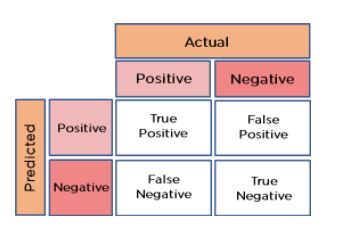

#### This diagram helps in understanding the concept of confusion matrix. 

In [54]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [55]:
#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(29.75, 0.5, 'True Class')

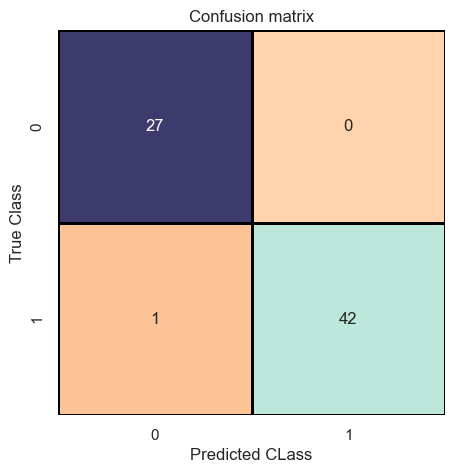

In [56]:
#We are creating Confusion Matrix on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.set(rc = {'figure.figsize':(5,5)})
sns.heatmap(cm,cmap = 'icefire_r', annot = True, cbar=False, linecolor='Black', linewidth = 2)

plt.title("Confusion matrix")

plt.xlabel('Predicted CLass')
plt.ylabel('True Class')


<AxesSubplot: >

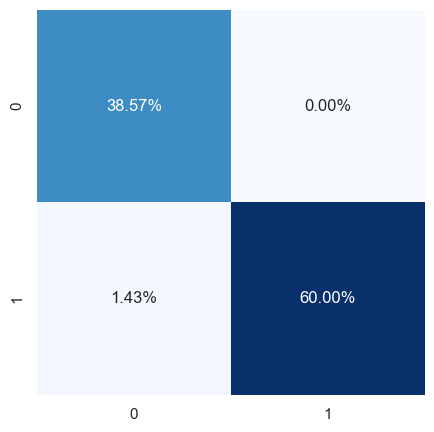

In [57]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

## Evaluating all kinds of evaluating parameters. 

#### Classification Report :
A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model. 

#### F1_score :
The F1 score is a machine learning metric that can be used in classification models. 

#### Precision_score :
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.

#### Recall_score :
Recall score is used to measure the model performance in terms of measuring the count of true positives in a correct manner out of all the actual positive values. Precision-Recall score is a useful measure of success of prediction when the classes are very imbalanced.

In [58]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is  Bernoulli Naive Bayes")
  
l_acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is: {}".format(l_acc))
  
prec = precision_score(y_test, y_predicted,average="binary", pos_label="Spam Comment")
print("The precision is: {}".format(prec))
  
rec = recall_score(y_test, y_predicted,average="binary", pos_label="Spam Comment")
print("The recall is: {}".format(rec))
  
f1 = f1_score(y_test, y_predicted,average="binary", pos_label="Spam Comment")
print("The F1-Score is: {}".format(f1))
  
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)

The model used is  Bernoulli Naive Bayes

The accuracy is: 0.9857142857142858
The precision is: 1.0
The recall is: 0.9767441860465116
The F1-Score is: 0.988235294117647
Classification Report is:

              precision    recall  f1-score   support

    Not Spam       0.96      1.00      0.98        27
Spam Comment       1.00      0.98      0.99        43

    accuracy                           0.99        70
   macro avg       0.98      0.99      0.99        70
weighted avg       0.99      0.99      0.99        70



# 2. Linear SVC

The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is. This makes this specific algorithm rather suitable for our uses, though you can use this for many situations.

In [59]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(X_train, y_train)

LinearSVC()

In [60]:
#Accuracy check of trainig data
#Get R2 score
classifier.score(X_train, y_train)

1.0

In [61]:
#Accuracy of test data
classifier.score(X_test, y_test) 

0.9714285714285714

### Prediction

In [62]:
# Predict the values on X_test_scaled dataset 
y_predicted = classifier.predict(X_test)

In [63]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [64]:
#Confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(29.75, 0.5, 'True Class')

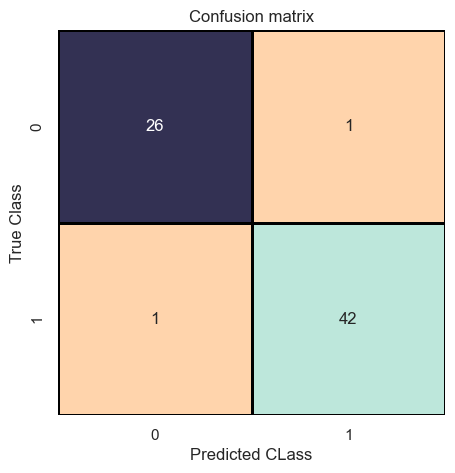

In [65]:
#We are drawing cm on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.heatmap(cm,cmap = 'icefire_r', annot = True, fmt= 'd', cbar=False, linecolor='Black', linewidth = 2)
plt.title("Confusion matrix")

plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

<AxesSubplot: >

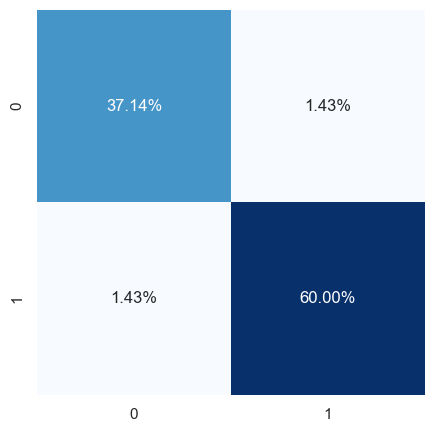

In [66]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

### Evaluating all kinds of evaluating parameters. 

In [67]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is LinearSVC")
  
k_acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is: {}".format(k_acc))
  
prec = precision_score(y_test, y_predicted,average="binary", pos_label="Spam Comment")
print("The precision is: {}".format(prec))
  
rec = recall_score(y_test, y_predicted,average="binary", pos_label="Spam Comment")
print("The recall is: {}".format(rec))
  
f1 = f1_score(y_test, y_predicted,average="binary", pos_label="Spam Comment")
print("The F1-Score is: {}".format(f1))
  
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)    

The model used is LinearSVC

The accuracy is: 0.9714285714285714
The precision is: 0.9767441860465116
The recall is: 0.9767441860465116
The F1-Score is: 0.9767441860465116
Classification Report is:

              precision    recall  f1-score   support

    Not Spam       0.96      0.96      0.96        27
Spam Comment       0.98      0.98      0.98        43

    accuracy                           0.97        70
   macro avg       0.97      0.97      0.97        70
weighted avg       0.97      0.97      0.97        70



# 3. Random Forest Classifier

Random Forest is a powerful and versatile supervised machine learning algorithm that grows and combines multiple decision trees to create a “forest.” It can be used for both classification and regression problems in R and Python.

Random Forest and Decision Tree Algorithm are considered best for the data that has outliers.

In [68]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
#clas = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
clas = RandomForestClassifier()
clas.fit(X_train, y_train)


RandomForestClassifier()

In [69]:
#Accuracy check of trainig data
#Get R2 score
clas.score(X_train, y_train)

1.0

In [70]:
#Accuracy of test data
clas.score(X_test, y_test) 

0.9714285714285714

### Prediction 

In [71]:
# predict the values on X_test_scaled dataset 
y_predicted = clas.predict(X_test)

In [72]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [73]:
#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(29.75, 0.5, 'True Class')

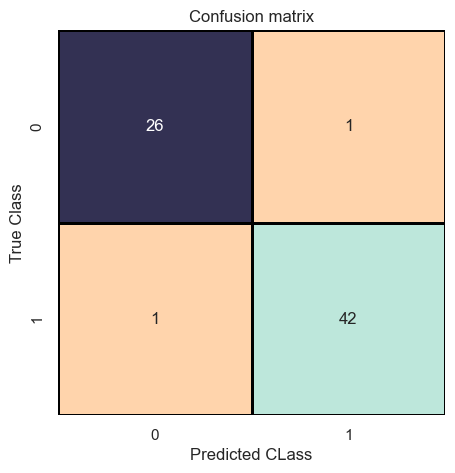

In [74]:
#We are drawing cm on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.heatmap(cm,cmap = 'icefire_r', annot = True, fmt= 'd', cbar=False, linecolor='Black', linewidth = 2)
plt.title("Confusion matrix")

plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

<AxesSubplot: >

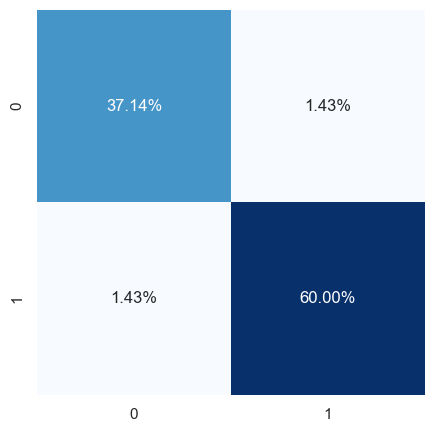

In [75]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

### Evaluating all kinds of evaluating parameters. 

In [76]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is Random Forest Classifier")
  
r_acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is {}".format(r_acc))
  
prec = precision_score(y_test, y_predicted,average="binary", pos_label="Spam Comment")
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, y_predicted,average="binary", pos_label="Spam Comment")
print("The recall is {}".format(rec))
  
f1 = f1_score(y_test, y_predicted,average="binary", pos_label="Spam Comment")
print("The F1-Score is {}".format(f1))
 
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)  

The model used is Random Forest Classifier

The accuracy is 0.9714285714285714
The precision is 0.9767441860465116
The recall is 0.9767441860465116
The F1-Score is 0.9767441860465116
Classification Report is:

              precision    recall  f1-score   support

    Not Spam       0.96      0.96      0.96        27
Spam Comment       0.98      0.98      0.98        43

    accuracy                           0.97        70
   macro avg       0.97      0.97      0.97        70
weighted avg       0.97      0.97      0.97        70



# Insight: -

In [77]:
cal_metric=pd.DataFrame([l_acc,k_acc,r_acc],columns=["Score in percentage"])
cal_metric.index=['Bernoulli Naive Bayes',
                  'LinearSVC',
                  'Random Forest']
cal_metric

,Score in percentage
Bernoulli Naive Bayes,0.985714
LinearSVC,0.971429
Random Forest,0.971429



- As you can see with our Bernoulli Naive Bayes Model(98.57%) we are getting a better result even for the recall (0.97 or 97%) which is the most tricky part.
- So we gonna save our model with  Bernoulli Naive Bayes Model

# Step 4: Save Model
**Goal:- In this step we are going to save our model in pickel format file.**

In [78]:
import pickle
pickle.dump(model , open('Spam_Comment_Detection_BernoulliNB.pkl', 'wb'))
pickle.dump(classifier , open('Spam_Comment_Detection_LinearSVC.pkl', 'wb'))
pickle.dump(clas , open('Spam_Comment_Detection_Logistic.pkl', 'wb'))

In [79]:
import pickle

def model_prediction(features):
    features = count_vec.transform([features]).toarray()
    pickled_model = pickle.load(open('C:/My Sample Notebook/Notebook Template/Spam Comments Detection/model/Spam_Comment_Detection_BernoulliNB.pkl', 'rb'))
    Comment = str(list(pickled_model.predict(features)))
    
    return str(f'The Comment is {Comment}')



#### We can test our model by giving our own parameters or features to predict. 

In [80]:
comment = "Lack of information!"

In [81]:
model_prediction(comment)

"The Comment is ['Not Spam']"

# Step 5: After making model and checking its accuracy, we are going to deploy it in API/ Web App. 

This step holds a great importance as in this step we make a Web API which integrates our model and let it interacts with user.
The user simply put data he is asked to fill and our API will help in predicting.

### There are many methods to create Web Application like Flask, Streamlit, etc. We going to use streamlit to create API. Below is an API refrence. 

https://tinyurl.com/bdexnk6v

# Conclusion

After observing the problem statement we have build an efficient model to overcome it. The above model helps in classifying the whether the comment is Spam or not. The accuracy for the prediction is 98.57%  and it signifies the accurate classification of the comment.  